## Professor evaluation vs physical appearance

### About Dataset
The data are gathered from student evaluations for 463 courses taught by a sample of 94 professors from the University of Texas at Austin. Also, six students rate the professors' physical appearance. The result is a data frame where each row contains a different course and each column has information on the course and the professor who taught that course.

### Exploratory Data Analysis

In [18]:
# import libraries likely needed for EDA

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summaries & tests
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Machine learning utilities 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

# Display settings for Pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", "{:.2f}".format)

# Plot settings for Seaborn/Matplotlib
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)

print("EDA libraries loaded successfully.")


EDA libraries loaded successfully.


In [20]:
# read CSV into a dataframe
df = pd.read_csv("evals.csv")

# check shape
print(df.shape) 


(463, 23)


In [24]:
# check for null values 
null_counts = df.isnull().sum()
print(null_counts)

course_id        0
prof_id          0
score            0
rank             0
ethnicity        0
gender           0
language         0
age              0
cls_perc_eval    0
cls_did_eval     0
cls_students     0
cls_level        0
cls_profs        0
cls_credits      0
bty_f1lower      0
bty_f1upper      0
bty_f2upper      0
bty_m1lower      0
bty_m1upper      0
bty_m2upper      0
bty_avg          0
pic_outfit       0
pic_color        0
dtype: int64


In [27]:
# data types for each column
print("Basic data types for each column:")
dtypes_series = df.dtypes
print(dtypes_series)

Basic data types for each column:
course_id          int64
prof_id            int64
score            float64
rank              object
ethnicity         object
gender            object
language          object
age                int64
cls_perc_eval    float64
cls_did_eval       int64
cls_students       int64
cls_level         object
cls_profs         object
cls_credits       object
bty_f1lower        int64
bty_f1upper        int64
bty_f2upper        int64
bty_m1lower        int64
bty_m1upper        int64
bty_m2upper        int64
bty_avg          float64
pic_outfit        object
pic_color         object
dtype: object


### Detailed descriptions of features and values:

- **course_id**: Integer identifying the course  
- **prof_id**: Integer identifying the professor who taught the course  
- **score**: Average professor evaluation score (1 = very unsatisfactory, 5 = excellent)  
- **rank**: Rank of professor — teaching, tenure track, tenured  
- **ethnicity**: Ethnicity of professor — not minority, minority  
- **gender**: Gender of professor  
- **language**: Language of school where professor received education — English or non-English  
- **age**: Age of professor  
- **cls_perc_eval**: Percent of students in class who completed evaluation  
- **cls_did_eval**: Number of students in class who completed evaluation  
- **cls_students**: Total number of students in class  
- **cls_level**: Class level — lower, upper  
- **cls_profs**: Number of professors teaching sections in course in sample — single, multiple  
- **cls_credits**: Number of credits of class — one credit (lab, PE, etc.), multi credit  
- **bty_f1lower**: Beauty rating of professor from lower level female (1–10)  
- **bty_f1upper**: Beauty rating of professor from upper level female (1–10)  
- **bty_f2upper**: Beauty rating of professor from second upper level female (1–10)  
- **bty_m1lower**: Beauty rating of professor from lower level male (1–10)  
- **bty_m1upper**: Beauty rating of professor from upper level male (1–10)  
- **bty_m2upper**: Beauty rating of professor from second upper level male (1–10)  
- **bty_avg**: Average beauty rating of professor  
- **pic_outfit**: Outfit of professor in picture — not formal, formal  
- **pic_color**: Color of professor's picture — color, black & white  


In [41]:
# Count unique values per column
unique_counts = df.nunique()

print(unique_counts)

course_id        463
prof_id           94
score             27
rank               3
ethnicity          2
gender             2
language           2
age               35
cls_perc_eval    260
cls_did_eval     104
cls_students     127
cls_level          2
cls_profs          2
cls_credits        2
bty_f1lower        8
bty_f1upper        9
bty_f2upper       10
bty_m1lower        7
bty_m1upper        9
bty_m2upper        9
bty_avg           35
pic_outfit         2
pic_color          2
dtype: int64


____________________________________________________________________________________________________________________________________

### Investigating relationships among categorical columns 

#### Create bar graphs of the categorical columns:

Found 9 columns with 'object' data type:
['rank', 'ethnicity', 'gender', 'language', 'cls_level', 'cls_profs', 'cls_credits', 'pic_outfit', 'pic_color']


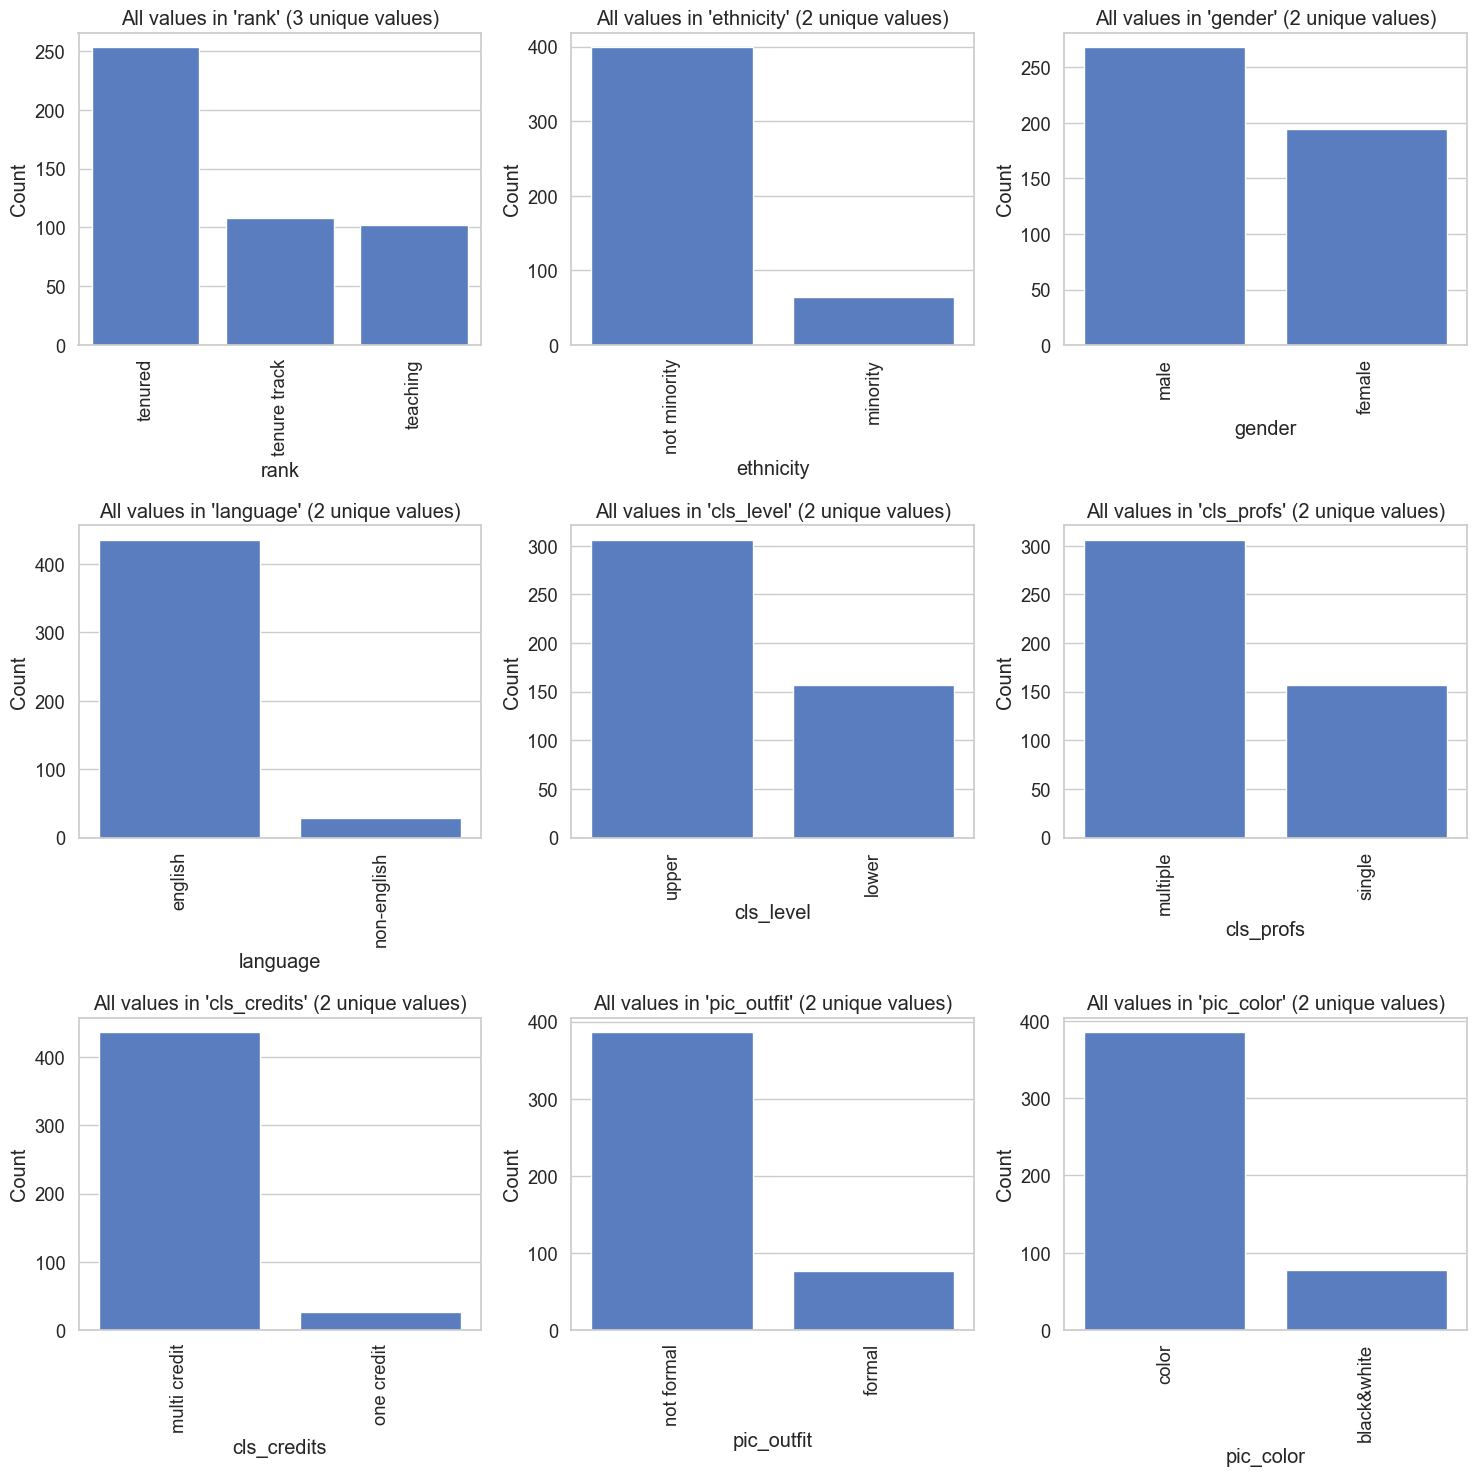

In [52]:
# Identify columns with 'object' data type
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of object columns
print(f"Found {len(object_columns)} columns with 'object' data type:")
print(object_columns)

# Create a figure with multiple subplots
if len(object_columns) > 0:
    # Calculate grid dimensions
    n_cols = min(3, len(object_columns))
    n_rows = (len(object_columns) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, n_rows * 5))
    
    for i, column in enumerate(object_columns, 1):
        # Count the frequency of each unique value
        value_counts = df[column].value_counts().sort_values(ascending=False)
        
        # Limit to top 15 categories if there are too many
        if len(value_counts) > 15:
            value_counts = value_counts.head(15)
            title = f"Top 15 values in '{column}' (out of {df[column].nunique()} unique values)"
        else:
            title = f"All values in '{column}' ({len(value_counts)} unique values)"
        
        # Create subplot
        plt.subplot(n_rows, n_cols, i)
        
        # Create bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        
    plt.tight_layout()
    plt.show()